In [1]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

## EDA for CBE APP Reviews

In [2]:
# Import necessary modules and packages
from scripts.utils import AppName
from scripts.sentiment_analysis import SentimentAnalysis
import pandas as pd

d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:
# load the review data
review_data = pd.read_csv('../Data/cleaned/cbe_reviews_cleaned.csv')

#show the first few rows of the review data
review_data.head(5)


,review,rating,date,bank,source
0,v.good app,4,2025-06-09,cbe,Google Play Store
1,very good app,1,2025-06-09,cbe,Google Play Store
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store
3,Best,5,2025-06-08,cbe,Google Play Store
4,20 years,5,2025-06-08,cbe,Google Play Store


In [4]:
# create an instance of the SentimentAnalysis class
analysis = SentimentAnalysis(review_data, AppName.CBE)

Checking for NLTK resources...
NLTK resources not found. Downloading...
NLTK resources downloaded.


In [5]:
# Preprocess review text
analysis.preprocess_reviews()
review_data.head(5)

Preprocessing reviews...
Reviews preprocessed. Tokens extracted.


,review,rating,date,bank,source,processed_review
0,v.good app,4,2025-06-09,cbe,Google Play Store,app
1,very good app,1,2025-06-09,cbe,Google Play Store,good app
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying
3,Best,5,2025-06-08,cbe,Google Play Store,best
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year


In [6]:
# Sentiment analysis using VADER
analysis.compute_vader_sentiment()
review_data.head(5)

Computing VADER sentiment scores...
VADER sentiment scores computed.


,review,rating,date,bank,source,processed_review,vader_score,vader_sentiment
0,v.good app,4,2025-06-09,cbe,Google Play Store,app,0.0000,neutral
1,very good app,1,2025-06-09,cbe,Google Play Store,good app,0.4404,positive
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying,0.8020,positive
3,Best,5,2025-06-08,cbe,Google Play Store,best,0.6369,positive
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year,0.0000,neutral


In [7]:
# Sentiment analysis using Text Blob
analysis.compute_textblob_sentiment()
review_data.head(5)

Computing TextBlob sentiment scores...
TextBlob sentiment scores computed.


,review,rating,date,bank,source,processed_review,vader_score,vader_sentiment,textblob_score,textblob_sentiment
0,v.good app,4,2025-06-09,cbe,Google Play Store,app,0.0000,neutral,0.00,neutral
1,very good app,1,2025-06-09,cbe,Google Play Store,good app,0.4404,positive,0.70,positive
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying,0.8020,positive,0.55,positive
3,Best,5,2025-06-08,cbe,Google Play Store,best,0.6369,positive,1.00,positive
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year,0.0000,neutral,0.00,neutral


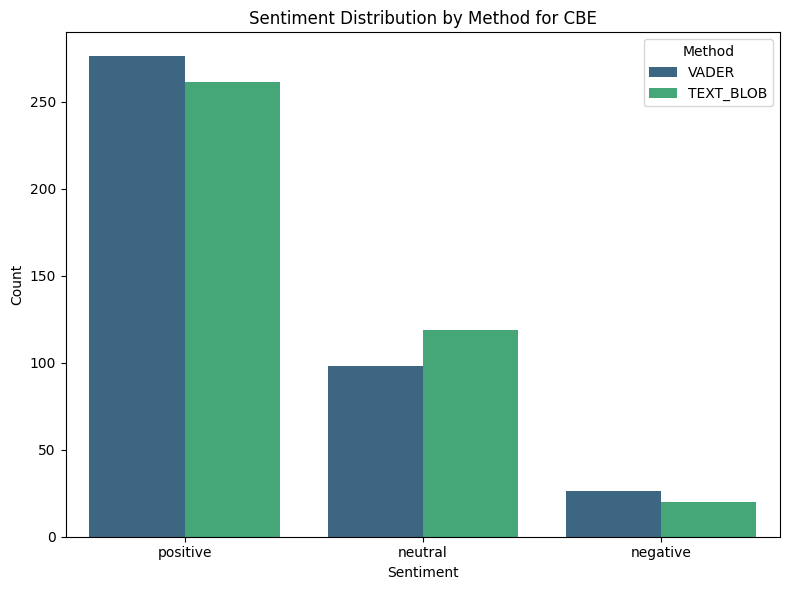

In [12]:
# Visualize sentiment distribution for all sentiment algorithms
analysis.plot_sentiment_distribution()

Top 20 keywords in positive reviews (vader):
[('app', 103), ('good app', 22), ('this app', 16), ('bank', 10), ('the app', 10), ('application', 9), ('banking', 9), ('screenshot', 6), ('transaction', 6), ('time', 6), ('developer', 6), ('great app', 6), ('life', 5), ('nice app', 5), ('very good app', 4), ('account', 4), ('transfer', 4), ('issue', 4), ('problem', 4), ('user', 4)]

Top 20 keywords in negative reviews (vader):
[('app', 11), ('banking', 6), ('service', 5), ('application', 5), ('bank', 4), ('problem', 3), ('account', 3), ('system', 3), ('fix', 2), ('day', 2), ('money', 2), ('this app', 2), ('error', 2), ('transaction', 2), ('week', 2), ('developer', 2), ('other bank', 2), ('company', 2), ('corporation', 2), ('this app problem', 1)]


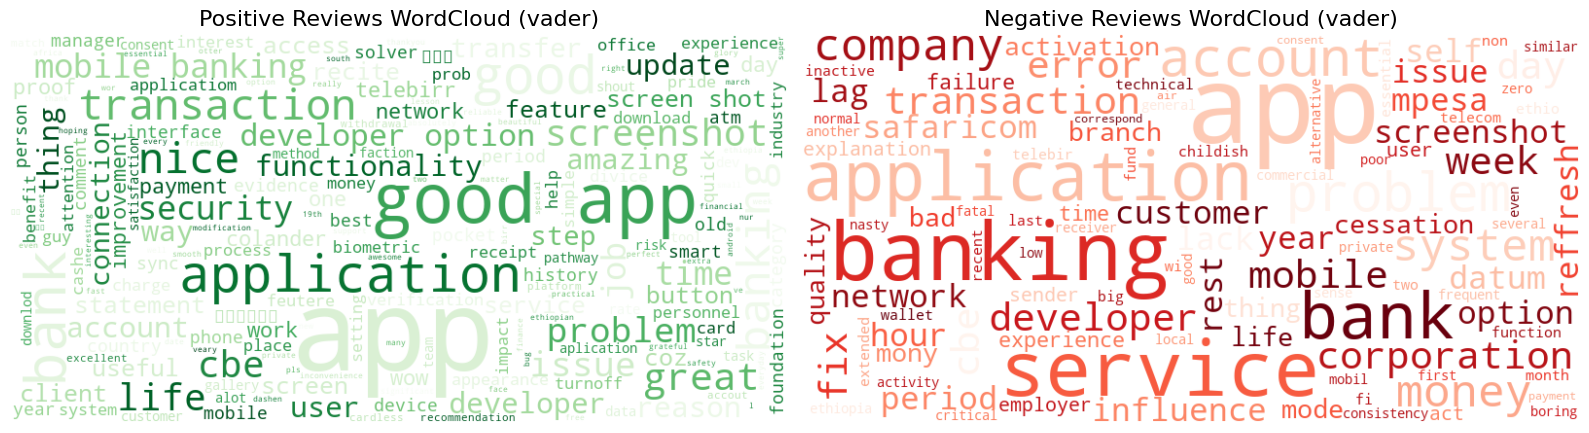

{'positive': [('app', 103),
  ('good app', 22),
  ('this app', 16),
  ('bank', 10),
  ('the app', 10),
  ('application', 9),
  ('banking', 9),
  ('screenshot', 6),
  ('transaction', 6),
  ('time', 6),
  ('developer', 6),
  ('great app', 6),
  ('life', 5),
  ('nice app', 5),
  ('very good app', 4),
  ('account', 4),
  ('transfer', 4),
  ('issue', 4),
  ('problem', 4),
  ('user', 4)],
 'negative': [('app', 11),
  ('banking', 6),
  ('service', 5),
  ('application', 5),
  ('bank', 4),
  ('problem', 3),
  ('account', 3),
  ('system', 3),
  ('fix', 2),
  ('day', 2),
  ('money', 2),
  ('this app', 2),
  ('error', 2),
  ('transaction', 2),
  ('week', 2),
  ('developer', 2),
  ('other bank', 2),
  ('company', 2),
  ('corporation', 2),
  ('this app problem', 1)]}

In [11]:
## Extract Keywords from positive and negative reviews
analysis.keyword_extraction(top_n=20)

In [13]:
analysis.extract_themes()

Top 30 keywords in positive reviews (vader):
[('app', 103), ('good app', 22), ('this app', 16), ('bank', 10), ('the app', 10), ('application', 9), ('banking', 9), ('screenshot', 6), ('transaction', 6), ('time', 6), ('developer', 6), ('great app', 6), ('life', 5), ('nice app', 5), ('very good app', 4), ('account', 4), ('transfer', 4), ('issue', 4), ('problem', 4), ('user', 4), ('option', 4), ('security', 4), ('screen', 4), ('connection', 3), ('way', 3), ('good job', 3), ('job', 3), ('reason', 3), ('step', 3), ('functionality', 3)]

Top 30 keywords in negative reviews (vader):
[('app', 11), ('banking', 6), ('service', 5), ('application', 5), ('bank', 4), ('problem', 3), ('account', 3), ('system', 3), ('fix', 2), ('day', 2), ('money', 2), ('this app', 2), ('error', 2), ('transaction', 2), ('week', 2), ('developer', 2), ('other bank', 2), ('company', 2), ('corporation', 2), ('this app problem', 1), ('a childish app', 1), ('big problem', 1), ('my money', 1), ('my account', 1), ('my mpesa', 

{'Account Access Issues': [('account', 2), ('my account', 1)],
 'Transaction Performance': [('transaction', 2), ('transfer', 1)],
 'User Interface & Experience': [('app', 2),
  ('this app', 2),
  ('application', 2),
  ('good app', 1),
  ('the app', 1),
  ('great app', 1),
  ('nice app', 1),
  ('very good app', 1),
  ('this app problem', 1),
  ('a childish app', 1)],
 'Customer Support': [('service', 1)],
 'Feature Requests': [('option', 1), ('functionality', 1)],
 'Other': [('bank', 2),
  ('banking', 2),
  ('developer', 2),
  ('problem', 2),
  ('screenshot', 1),
  ('time', 1),
  ('life', 1),
  ('issue', 1),
  ('user', 1),
  ('security', 1),
  ('screen', 1),
  ('connection', 1),
  ('way', 1),
  ('good job', 1),
  ('job', 1)]}

Top 60 keywords in positive reviews (vader):
[('app', 103), ('good app', 22), ('this app', 16), ('bank', 10), ('the app', 10), ('application', 9), ('banking', 9), ('screenshot', 6), ('transaction', 6), ('time', 6), ('developer', 6), ('great app', 6), ('life', 5), ('nice app', 5), ('very good app', 4), ('account', 4), ('transfer', 4), ('issue', 4), ('problem', 4), ('user', 4), ('option', 4), ('security', 4), ('screen', 4), ('connection', 3), ('way', 3), ('good job', 3), ('job', 3), ('reason', 3), ('step', 3), ('functionality', 3), ('thing', 3), ('the good app', 3), ('update', 3), ('some issue', 2), ('the bank', 2), ('client', 2), ('the screenshot', 2), ('old transaction', 2), ('coz', 2), ('day', 2), ('person', 2), ('colander', 2), ('service', 2), ('smart app', 2), ('very useful app', 2), ('access', 2), ('developer option', 2), ('improvement', 2), ('button', 2), ('money', 2), ('telebirr', 2), ('its good', 2), ('good', 2), ('network', 2), ('work', 2), ('feature', 2), ('statement', 2), ('s

<string>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



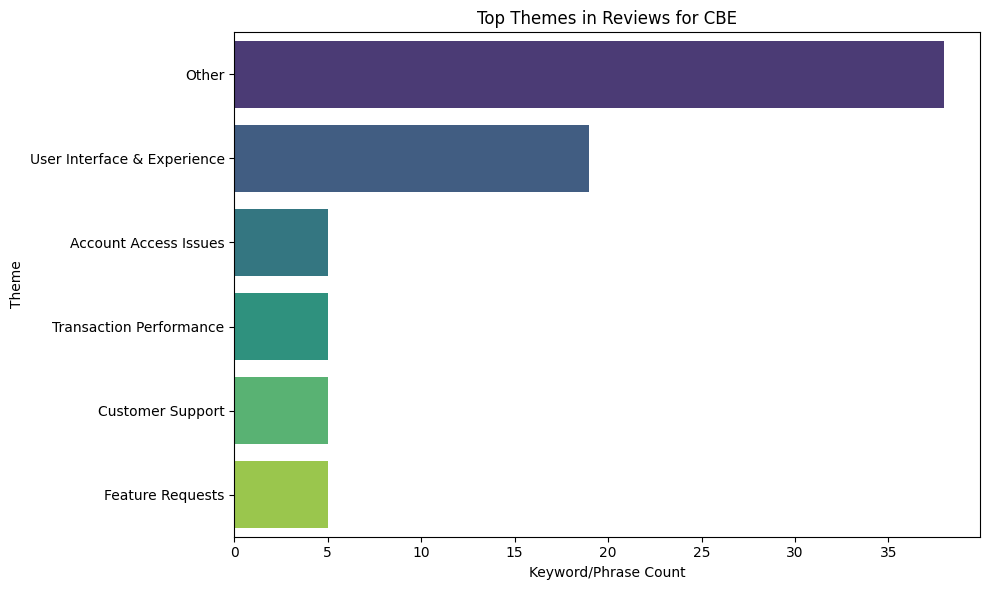

In [14]:
## Visualize the themes
analysis.plot_theme_map(top_n=30)